In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]
Tensorflow version 1.13.1
Pandas version 0.24.2
Numpy version 1.16.2


In [2]:
# Function to Model: y = a * x^2 + b * x + c
# Let's generate 1000 random smaples
pool = np.random.rand(1000,1).astype(np.float32)
# Shuffle the samples
np.random.shuffle(pool)
# Sample size of 15%
sample = int(1000*0.15)
# 15% test
test_x = pool[0:sample]
# 85% training
train_x = pool[sample:]
print('Testing data points: ' + str(test_x.shape))
print('Training data points: ' + str(train_x.shape))
# Let's compute the output using 2 for a, 3 for b, and 5 for c
test_y = 2.0*test_x**2+3.0*test_x+5
train_y = 2.0*train_x**2+3.0*train_x+5

Testing data points: (150, 1)
Training data points: (850, 1)


In [3]:
df = pd.DataFrame({'x':train_x[:,0], 'y':train_y[:,0]})
df.head()

,x,y
0,0.521559,7.108723
1,0.721422,8.205167
2,0.561496,7.315041
3,0.361092,6.344051
4,0.307883,6.113232


In [4]:
df.describe()

,x,y
count,850.000000,850.000000
mean,0.492460,7.116602
std,0.277823,1.390473
min,0.001100,5.003303
25%,0.258248,5.908128
50%,0.489387,6.947158
75%,0.728211,8.245218
max,0.997320,9.981256


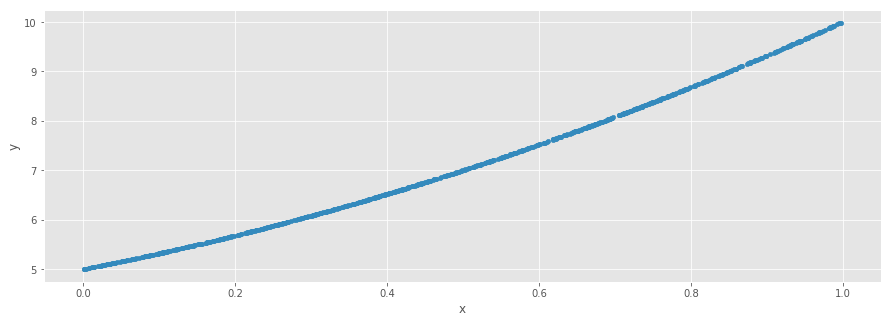

In [5]:
df.plot.scatter(x='x',y='y',figsize=(15,5))

In [6]:
# Model your Graph
# you can adjust the number of neurons in the hidden layer here
hidden_size = 1
# placeholders
# shape=[how many samples do you have, how many input neurons]
x = tf.placeholder(tf.float32, shape=[None, 1], name="01_x")
y = tf.placeholder(tf.float32, shape=[None, 1], name="01_y")
print("shape of x and y:")
print(x.get_shape(), y.get_shape())

shape of x and y:
(?, 1) (?, 1)


In [7]:
# create your first hidden layer!
# tf.truncated_normal ([how many samples do you have, size of output layer])
W1 = tf.Variable(tf.truncated_normal([1, hidden_size], mean=0.1, stddev=0.1), name='w1')
# tf.truncated_normal ([size of output layer])
b1 = tf.Variable(tf.truncated_normal([hidden_size], mean=0.1, stddev=0.1), name="b1")
# shape of h1 = [size of your sample, size of output layer]
h1 = tf.nn.relu(tf.matmul(x,W1) + b1, name='h1')
print("shape of hidden layer")
print(h1.get_shape())

Instructions for updating:
Colocations handled automatically by placer.
shape of hidden layer
(?, 1)


In [11]:
# Output Layer
W = tf.Variable(tf.truncated_normal([hidden_size, 1], mean=0.1, stddev=0.1), name="w")
b = tf.Variable(tf.truncated_normal([1], mean=0.1, stddev=0.1), name="b")
# note that the input comes from our hidden layer h1
pred = tf.nn.relu(tf.matmul(h1, W) + b)
print("shape of output layer:")
print(pred.get_shape())

shape of output layer:
(?, 1)


In [12]:
# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - y))
# pick optimizer
optimizer = tf.train.GradientDescentOptimizer(0.09)
train = optimizer.minimize(loss)

In [13]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
# initialize the variables
init = tf.global_variables_initializer()
# hold step and error values
t = []
# Run your graph
with tf.Session() as sess:
    # initialize variables
    sess.run(init)
    # Fit the function.
    for step in range(250):
        # get your data
        train_data = {x:train_x, y:train_y}
        test_data = {x:test_x, y:test_y}
        # training in progress...
        train_loss, train_pred = sess.run([loss, train], feed_dict=train_data)        
        # print every n iterations
        if step%50==0:
            # capture the step and error for analysis
            t.append((step, train_loss))    
            # get snapshot of current training accuracy       
            train_acc = accuracy.eval(train_data)            
            print("Training loss at step %d: %f" % (step, train_loss))                       
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval(train_data) )
    print("Accuracy on the Test Set:", accuracy.eval(test_data))
    # capture predictions on test data 
    test_results = sess.run(pred, feed_dict={x:test_x})  
    df_final = pd.DataFrame({'test_x':test_x[:,0], 'pred':test_results[:,0]})
    
    # capture training and validation loss
    df_loss = pd.DataFrame(t, columns=['step', 'train_loss'])  

Training loss at step 0: 50.469429
Training loss at step 50: 0.023100
Training loss at step 100: 0.020358
Training loss at step 150: 0.020357
Training loss at step 200: 0.020357
Accuracy on the Training Set: 0.87764704
Accuracy on the Test Set: 0.87333333


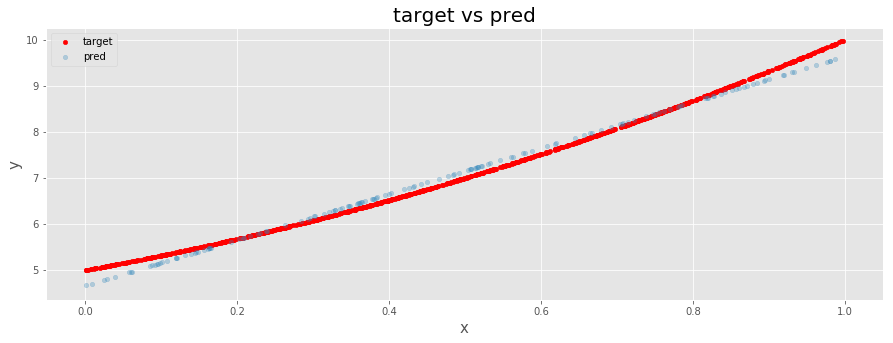

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')
# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)
# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15)
axes.legend(["target", "pred"], loc='best');